In [1]:
from train import *
import pandas as pd
from policy import *
import random

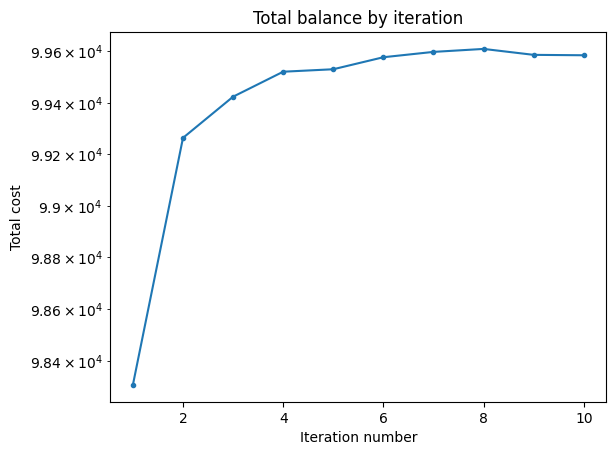

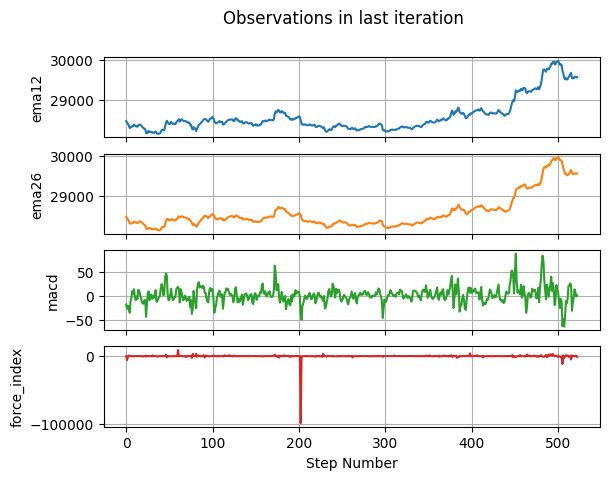

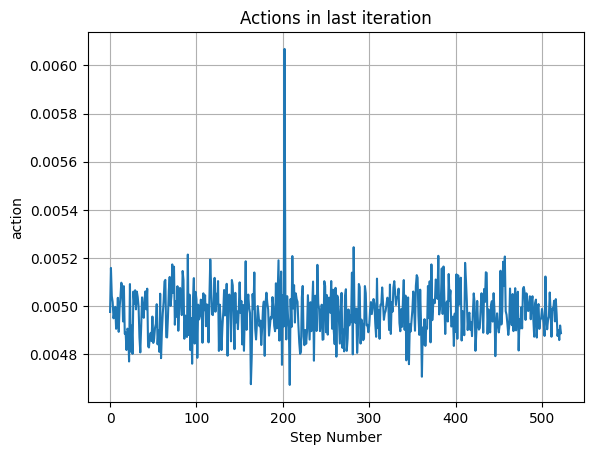

In [2]:
SEED = 14
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)

bot = AdaptiveGridBot(pd.read_csv('../../../data/processed/btcusdt.csv'), use_up=None)
model = GaussianPDFModel(
    dim_observation=4,
    dim_action=1,
    #---------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    scale_factor=100,  # TRY TO FIND scale_factor EMPIRICALLY
    n_hidden_layers=10,
    dim_hidden=6, # TRY TO FIND dim_hidden EMPIRICALLY
    std=0.0001, # TRY TO FIND STD EMPIRICALLY
    leakyrelu_coef=0.5
    #---------------------------------------------------------------------------
)

optimizer = Optimizer(
    model=model,
    opt_method=torch.optim.Adam,
    #---------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    opt_options=dict(lr=0.005), # TRY TO FIND lr EMPIRICALLY
    #---------------------------------------------------------------------------
)


policy = PolicyREINFORCE(model, optimizer, is_with_baseline=True)

trivial_terminantion_criterion = lambda *args: False



scenario = MonteCarloSimulationScenario(
    bot,
    policy=policy,
    #---------------------------------------------------------------------------
    # YOUR CODE GOES HERE
    N_episodes=10   , # Increasing the number of episodes stabilizes learning, but you can manage it with N_episodes=1
    N_iterations=50, # You can change the number of iterations if you want
    #---------------------------------------------------------------------------
    termination_criterion=trivial_terminantion_criterion,
    discount_factor=1.0, # do not change this
)

try:
    scenario.run()
except KeyboardInterrupt:
    clear_output(wait=True)
    scenario.plot_data()

clear_output(wait=True)
scenario.plot_data()

---